In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\sonali.b.choudhary\OneDrive - Accenture\Desktop\datasets\Walmart.csv")

In [3]:
df.head(5)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [4]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


In [5]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

In [6]:
df.duplicated().count()

3203

In [7]:
# Removing the outliers from the dataset
df=df[df["Sales"]<8000]
df=df[df["Profit"]<6000]

In [8]:
df.describe()

,Sales,Quantity,Profit
count,3201.000000,3201.000000,3201.000000
mean,219.703318,3.828491,31.668635
std,443.318974,2.261557,127.793313
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.810000,3.000000,11.170000
75%,215.590000,5.000000,32.930000
max,5083.960000,14.000000,1906.490000


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-09-

In [10]:
df.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17


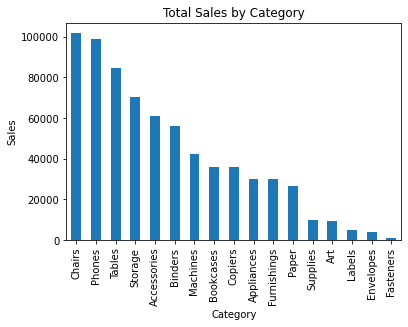

In [11]:
# Group the data by category and sum the sales
category_sales = df.groupby("Category")["Sales"].sum()

# Sort the sales by descending order and plot a bar chart
category_sales.sort_values(ascending=False).plot(kind="bar")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

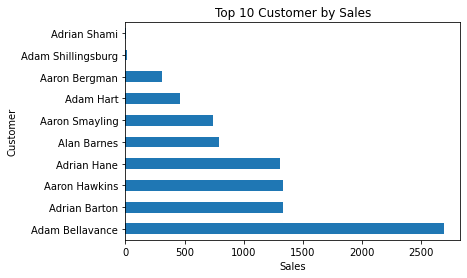

In [12]:
# Group the data by customer and sum the sales
customer_sales = df.groupby("Customer Name")["Sales"].sum().head(10)

# Sort the sales by descending order and plot a horizontal bar chart
customer_sales.sort_values(ascending=False).plot(kind="barh")
plt.title("Top 10 Customer by Sales")
plt.xlabel("Sales")
plt.ylabel("Customer")
plt.show()

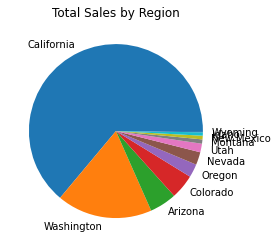

In [13]:
# Group the data by region and sum the sales
region_sales = df.groupby("State")["Sales"].sum()

# Sort the sales by descending order and plot a pie chart
region_sales.sort_values(ascending=False).plot(kind="pie")
plt.title("Total Sales by Region")
plt.ylabel("")
plt.show()

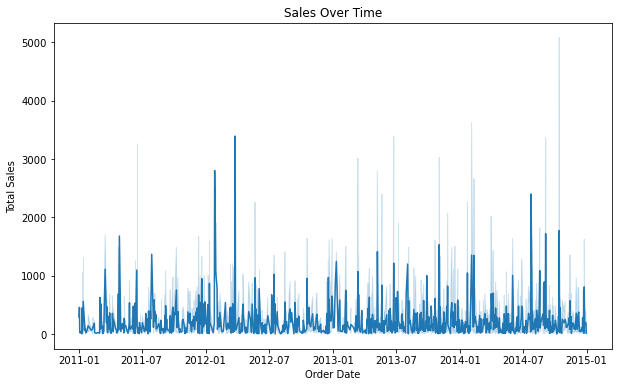

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Order Date", y="Sales", data=df)
plt.title('Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Order Date')
plt.show()

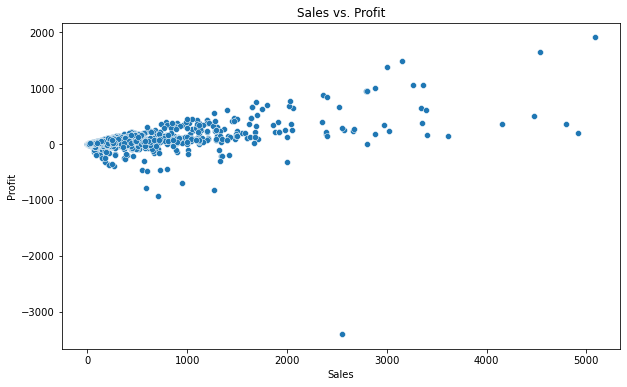

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title('Sales vs. Profit')
plt.ylabel('Profit')
plt.xlabel('Sales')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [17]:
# Backing up original data before altering
backup=df.copy(deep=True)

In [18]:
# encode categorical variables
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])
df["City"] = le.fit_transform(df["City"])
df["State"] = le.fit_transform(df["State"])
df["Category"] = le.fit_transform(df["Category"])
df["Product Name"] = le.fit_transform(df["Product Name"])

In [19]:
scaler = StandardScaler()
df[["Sales", "Quantity", "Profit"]] = scaler.fit_transform(df[["Sales", "Quantity", "Profit"]])

In [20]:
# perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Sales", "Quantity", "Profit"]])

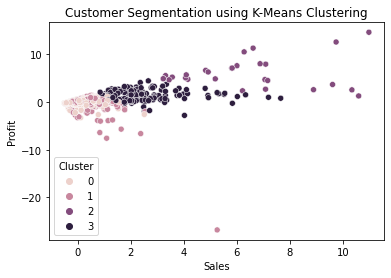

In [21]:
# visualize the clusters
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Cluster")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()

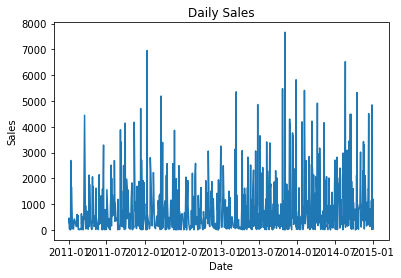

In [22]:
# Group the sales data by Order Date and sum up the Sales column for each day
daily_sales = backup.groupby('Order Date')['Sales'].sum()

# Create a new dataframe with the daily sales time-series data
daily_sales_df = pd.DataFrame({'Order Date': daily_sales.index, 'Sales': daily_sales.values})

# Set the Order Date column as the index of the dataframe
daily_sales_df.set_index('Order Date', inplace=True)

# Create a time-series plot of the daily sales data
plt.plot(daily_sales)
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [23]:
# Loading Necessary Library
from prophet import Prophet

# Prepare the data for time-series forecasting
df = backup.groupby('Order Date')['Sales'].sum().reset_index()
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Create and train the model
model = Prophet()
model.fit(df)


# Make future sales predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


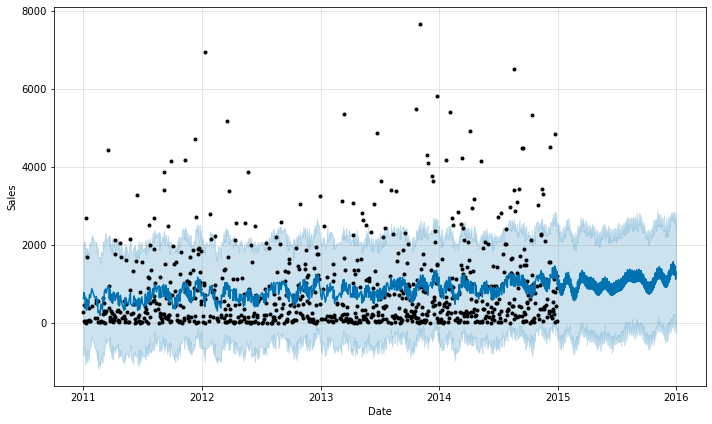

In [24]:
# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Sales')

In [25]:
# Backing up Data
backup2=backup.copy(deep=True)

In [26]:
# Import necessary libraries
from sklearn.ensemble import IsolationForest

# Select the 'Sales' column for anomaly detection
X = backup2[['Sales']]

# Initialize the Isolation Forest model with the desired settings
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)

# Fit the model on the data
model.fit(X)

# Predict the anomalies in the data
y_pred = model.predict(X)

# Add the predicted labels to the dataframe
backup2['Anomaly'] = y_pred

# Print the anomalies in the data
backup2[backup2['Anomaly'] == -1]

C:\Users\sonali.b.choudhary\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Anomaly
6,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Tables,Chromcraft Rectangular Conference Tables,1706.18,9.0,85.31,-1
13,CA-2012-106320,2012-09-25,2012-09-30,Emily Burns,United States,Orem,Utah,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.63,3.0,240.26,-1
21,CA-2011-106376,2011-05-12,2011-10-12,Brendan Sweed,United States,Gilbert,Arizona,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.02,8.0,111.30,-1
72,CA-2013-145625,2013-12-09,2013-09-18,Kelly Collister,United States,San Diego,California,Accessories,Logitech P710e Mobile Speakerphone,3347.37,13.0,636.00,-1
80,CA-2012-130890,2012-02-11,2012-06-11,Jas O'Carroll,United States,Los Angeles,California,Tables,"Bevis Round Bullnose 29"" High Table Top",1038.84,5.0,51.94,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,CA-2013-160717,2013-07-06,2013-12-06,Maria Etezadi,United States,Santa Barbara,California,Phones,Samsung Galaxy Mega 6.3,3023.93,9.0,226.79,-1
3134,CA-2013-146913,2013-01-11,2013-06-11,Sylvia Foulston,United States,San Francisco,California,Chairs,Office Star - Professional Matrix Back Chair w...,1403.92,5.0,70.20,-1
3161,CA-2012-164301,2012-03-26,2012-03-30,Ellis Ballard,United States,Seattle,Washington,Tables,Bush Advantage Collection Racetrack Conference...,3393.68,8.0,610.86,-1
3177,CA-2013-129630,2013-05-09,2013-05-09,Ionia McGrath,United States,San Francisco,California,Copiers,Canon PC1060 Personal Laser Copier,2799.96,5.0,944.99,-1
